In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

The code is designed to loop through each category of chess pieces, read the images within those categories, resize them to a consistent size (e.g., 224x224 pixels), and collect both the resized images (X_train) and their corresponding labels (y_train) for later use in model training.

In [2]:
import os
import cv2

# Define the path to your dataset folder
dataset_path = '../Chessman-image-dataset/Chess'

# Initialize empty lists to store images and labels
X_train = []
y_train = []

# Iterate through the subfolders (chess piece categories)
for chess_piece in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, chess_piece)):
        for image_file in os.listdir(os.path.join(dataset_path, chess_piece)):
            image_path = os.path.join(dataset_path, chess_piece, image_file)
            
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            
            # Check if the image was read correctly
            if image is not None:
                # Resize the image to a consistent size (e.g., 224x224)
                image = cv2.resize(image, (224, 224))
                
                # Append the image to X_train and the label to y_train
                X_train.append(image)
                y_train.append(chess_piece)
            else:
                print(f"Failed to read image {image_path}. It may be corrupted or in an unsupported format.")

In [3]:
# Convert X_train to a numpy array
X_train = np.array(X_train)

In [4]:
X_train[0]

array([[[ 27,  38,  52],
        [ 27,  38,  52],
        [ 26,  37,  51],
        ...,
        [ 39,  46,  61],
        [ 39,  46,  61],
        [ 39,  46,  61]],

       [[ 28,  39,  53],
        [ 27,  38,  52],
        [ 27,  38,  52],
        ...,
        [ 37,  44,  59],
        [ 38,  45,  60],
        [ 38,  45,  60]],

       [[ 29,  40,  54],
        [ 28,  39,  53],
        [ 28,  39,  53],
        ...,
        [ 34,  41,  56],
        [ 35,  42,  57],
        [ 35,  42,  57]],

       ...,

       [[ 60, 110, 138],
        [ 61, 111, 139],
        [ 62, 112, 140],
        ...,
        [ 57, 101, 125],
        [ 59, 103, 127],
        [ 62, 106, 130]],

       [[ 71, 121, 149],
        [ 76, 126, 154],
        [ 82, 132, 160],
        ...,
        [ 54,  98, 122],
        [ 59, 103, 127],
        [ 63, 107, 131]],

       [[ 79, 129, 157],
        [ 85, 135, 163],
        [ 90, 140, 168],
        ...,
        [ 45,  89, 113],
        [ 49,  93, 117],
        [ 53,  97, 121]]

In [5]:
# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [6]:
y_train_encoded[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [7]:
# Split the data into training and validation sets (adjust the test_size as needed)
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

In [8]:
y_train_encoded[:40]

array([0, 1, 2, 1, 3, 2, 4, 2, 4, 1, 2, 2, 3, 4, 1, 2, 3, 4, 2, 0, 0, 1,
       1, 0, 1, 3, 2, 4, 2, 3, 1, 0, 4, 0, 0, 0, 2, 4, 0, 0], dtype=int64)

In [9]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [10]:
# Verify the shapes of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_encoded.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val_encoded.shape)

X_train shape: (521, 224, 224, 3)
y_train shape: (521,)
X_val shape: (131, 224, 224, 3)
y_val shape: (131,)


In [11]:
# Define a list of class labels for reference
class_labels = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

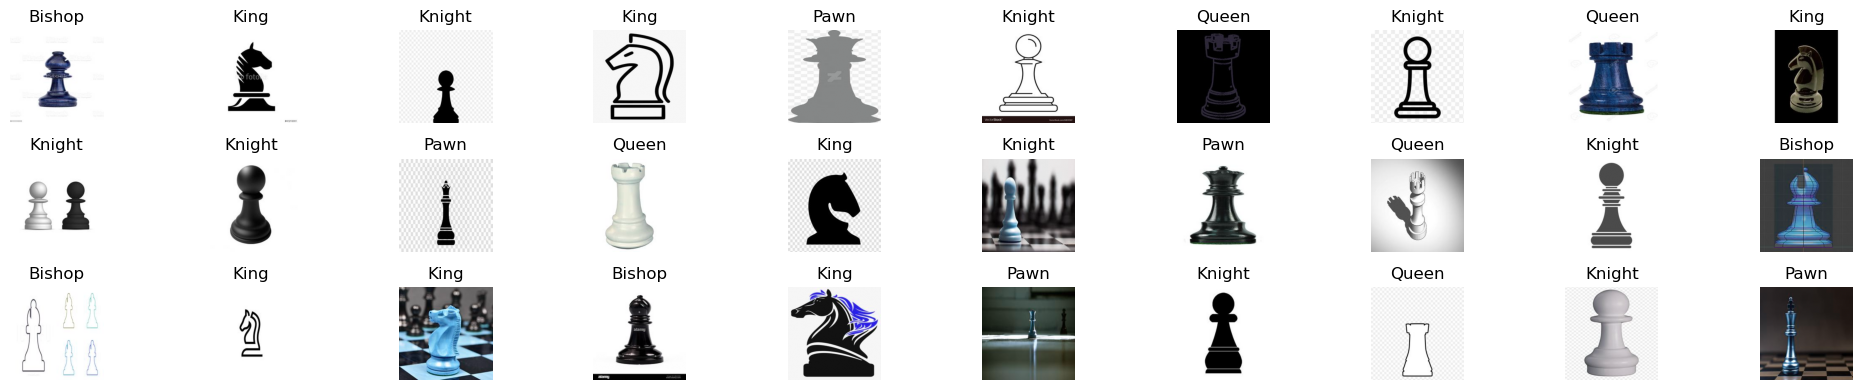

In [12]:
# Set the number of images to display side by side with their actual labels
num_images_to_display = 30


plt.figure(figsize=(20, 4))  


for i in range(num_images_to_display):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train_encoded[i]])  # Set the title as the class label
    plt.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

The code is about building a custom image classification model using transfer learning with the VGG16 architecture. It loads a pre-trained VGG16 model, adds custom classification layers on top, freezes the pre-trained layers, and compiles the model for training.

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(6, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [14]:
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print("Number of unique classes:", num_classes)

Number of unique classes: 5


In [15]:
print("Sample labels:", y_train_encoded[:10])

Sample labels: [0 1 2 1 3 2 4 2 4 1]


In [16]:
# # Fit (train) the model on the training data and validate it on the validation data
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded))

Epoch 1/20


17/17 [==============================] - 62s 4s/step - loss: 3.5846 - accuracy: 0.2399 - val_loss: 1.2509 - val_accuracy: 0.5115
Epoch 2/20
17/17 [==============================] - 62s 4s/step - loss: 2.0321 - accuracy: 0.3781 - val_loss: 1.1127 - val_accuracy: 0.6260
Epoch 3/20
17/17 [==============================] - 64s 4s/step - loss: 1.3014 - accuracy: 0.5010 - val_loss: 1.0026 - val_accuracy: 0.6794
Epoch 4/20
 1/17 [>.............................] - ETA: 55s - loss: 1.1663 - accuracy: 0.5312

In [ ]:
# Extracting the loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']  # This might be 'acc' in older versions of Keras
val_accuracy = history.history['val_accuracy']  # This might be 'val_acc' in older versions of Keras

In [ ]:
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(X_val)
pred[:10]

In [ ]:
y_val_encoded[:10]

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val_encoded)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the number of folds (e.g., 5)
num_folds = 5

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation results for each fold
val_accuracies = []

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Perform k-fold cross-validation
for train_index, _ in kf.split(X_train, y_train_encoded):
    X_train_fold, y_train_fold = X_train[train_index], y_train_encoded[train_index]
    
    
    
    # Create an ImageDataGenerator for data augmentation
    train_datagen = datagen.flow(X_train_fold, y_train_fold, batch_size=32)
    
    
    model.fit(train_datagen, epochs=15, verbose=0)
    
    
    _, val_accuracy = model.evaluate(X_val, y_val_encoded)
    val_accuracies.append(val_accuracy)

# Calculate and print the mean and standard deviation of validation accuracies
mean_val_accuracy = np.mean(val_accuracies)
std_val_accuracy = np.std(val_accuracies)
print("Mean Validation Accuracy: {:.2f}%".format(mean_val_accuracy * 100))
print("Standard Deviation: {:.2f}".format(std_val_accuracy))

In [ ]:
img_test = '../Chessman-image-dataset/test/knight.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(img_test)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the custom image
custom_image_path = img_test
img = image.load_img(custom_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

# Make predictions on the custom image
predictions = model.predict(img_array)

# Use argmax to get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Print the predicted class label and its probability
print("Predicted class:",class_labels[predicted_class_index])

In [ ]:
# Export model
model.save('chess_piece_classifier_02.h5')